## Scikit-learn prac: Supervised learning

## What we are going to learn
+ What is the supervised learning
+ kNN(classification)
+ classification practice using scikit-learn
+ Regression
+ Linear Regression practice using scikit-learn

## 1. supervised learning
+ In Supervised Learning, we have a dataset consisting of both **features** and **labels**. 
+ The task is to construct an estimator which is able to predict the label of an object given the set of features. 
+ The example is predicting the species of iris given a set of measurements of its flower

+ Supervised learning is further broken down into two categories, **classification** and **regression**. 
+ In classification, the label is **discrete**, while in regression, the label is **continuous**.

## 2. Classification => kNN(k Nearest Neighbors)
+ K nearest neighbors (kNN) is one of the classification algorithms.
+ given a new, unknown observation, look up in your reference database which ones have the closest features and assign the predominant class.
+ Let’s try it out on our iris classification problem:

## 3. Recognize species of irises
+ The data consists of three different species of irises(Setosa, Versicolor, Virginica)
+ Three different species and fixed number of features for each sample
+ Features in the Iris dataset:
    + speal length,  sepal width, petal length, petal width
+ Classes to predict
    + Setosa, Versicolour, Virginica

In [4]:
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
import numpy as np

In [5]:
from sklearn import neighbors, datasets
iris = datasets.load_iris()
X, y = iris.data, iris.target

#### 2.1) K-nearest neighbor classfication of Iris data

In [6]:
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
print("Predicted value of [3, 5, 4, 2] : ", iris.target_names[knn.predict([[3, 5, 4, 2]])])

Predicted value of [3, 5, 4, 2] :  ['virginica']


In [7]:
from matplotlib.colors import ListedColormap

# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                    # avoid this ugly slicing by using a two-dim dataset
y = iris.target

knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

(4.2, 8.0, 1.9, 4.5)

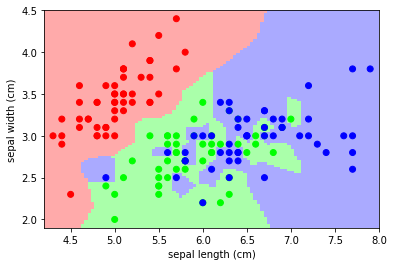

In [8]:
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')

### Try 3 neighbors

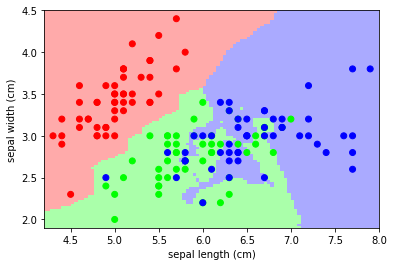

In [9]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')

plt.show()

## 4. Another example

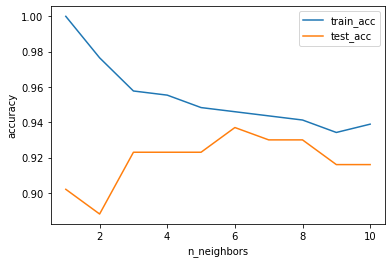

In [10]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# 1 에서 10 까지 n_neighbors 를 적용
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="train_acc")
plt.plot(neighbors_settings, test_accuracy, label="test_acc")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()